# Import

In [1]:
import pandas as pd
import copy
import scipy
import numpy as np
from scipy import stats

# Read Data

In [2]:
data = pd.read_csv('used_cars.csv')
df = copy.deepcopy(data)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# pearsonr

In [3]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )


The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732947e-20
The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259526e-48
The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64
The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476325e-31


## Conclusion:
1. Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).
2. Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).
3. Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).
4. Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

# Loop pearsonr

In [4]:
df.dropna(inplace = True)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_columns

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'diesel',
 'gas']

In [5]:
for param in numeric_columns:
    pearson_coef, p_value = stats.pearsonr(df[param], df['price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value,'\n')

symboling
The Pearson Correlation Coefficient for  symboling  is -0.07642047061546409  with a P-value of P = 0.28705658319893806 

normalized-losses
The Pearson Correlation Coefficient for  normalized-losses  is 0.13818263263808836  with a P-value of P = 0.053426359970702636 

wheel-base
The Pearson Correlation Coefficient for  wheel-base  is 0.5919557630546541  with a P-value of P = 6.413338815390866e-20 

length
The Pearson Correlation Coefficient for  length  is 0.6894657962054991  with a P-value of P = 5.531750161102461e-29 

width
The Pearson Correlation Coefficient for  width  is 0.7441763798094063  with a P-value of P = 7.736546677138932e-36 

height
The Pearson Correlation Coefficient for  height  is 0.18240664117726152  with a P-value of P = 0.010501513605047601 

curb-weight
The Pearson Correlation Coefficient for  curb-weight  is 0.8284829891299341  with a P-value of P = 9.745571059119235e-51 

engine-size
The Pearson Correlation Coefficient for  engine-size  is 0.8892649648

# Statistical Functions

## stats.describe
### Compute descriptive statistics.

In [6]:
from scipy.stats import describe
data = np.array([1, 2, 3, 4, 5])
description = describe(data)
print(description)

DescribeResult(nobs=5, minmax=(1, 5), mean=3.0, variance=2.5, skewness=0.0, kurtosis=-1.3)


## stats.norm
### Generate random samples from a normal distribution and compute the probability density function.

In [7]:
from scipy.stats import norm

samples = norm.rvs(size=10)
pdf = norm.pdf(samples)
print("Samples:", samples)
print("PDF:", pdf)

Samples: [ 0.17051246  0.70993291  0.85516343  0.61424331  0.89014399 -1.87756131
  0.13904549  1.34927734  0.74039417  0.59060216]
PDF: [0.39318471 0.31007505 0.27676382 0.33035549 0.268443   0.0684565
 0.39510436 0.16053983 0.30330078 0.33509407]


# 2. Optimization Functions

## optimize.minimize
### Minimize a function using various methods.

In [8]:
import numpy as np
from scipy.optimize import minimize

def objective_function(x):
    return x**2 + 3*x + 2

result = minimize(objective_function, x0=0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.25
        x: [-1.500e+00]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


## optimize.curve_fit
### Fit a curve to data.

Optimal parameters: [ 2.1786192  -1.26962324]


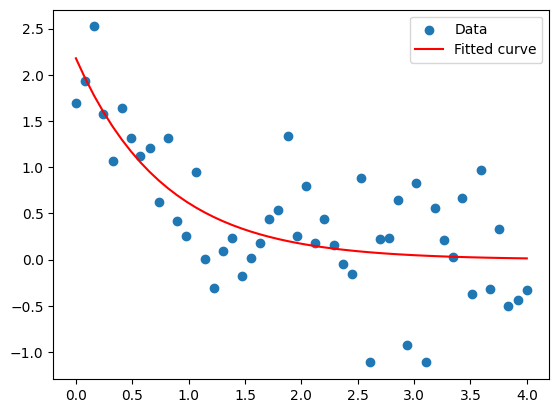

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, a, b):
    return a * np.exp(b * x)

xdata = np.linspace(0, 4, 50)
ydata = func(xdata, 2.5, -1.3) + 0.5 * np.random.normal(size=len(xdata))

popt, pcov = curve_fit(func, xdata, ydata)
print("Optimal parameters:", popt)

plt.scatter(xdata, ydata, label='Data')
plt.plot(xdata, func(xdata, *popt), label='Fitted curve', color='red')
plt.legend()
plt.show()

# 3. Linear Algebra

## linalg.inv
### Compute the inverse of a matrix.

In [10]:
import numpy as np
from scipy.linalg import inv

matrix = np.array([[1, 2], [3, 4]])
inverse_matrix = inv(matrix)
print(inverse_matrix)

[[-2.   1. ]
 [ 1.5 -0.5]]


## linalg.eig
### Compute the eigenvalues and right eigenvectors of a square array.

In [11]:
import numpy as np
from scipy.linalg import eig

matrix = np.array([[1, 2], [3, 4]])
eigenvalues, eigenvectors = eig(matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [-0.37228132+0.j  5.37228132+0.j]
Eigenvectors: [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


# 4. Signal Processing

## signal.find_peaks
### Find peaks in a signal.

Peaks at indices: [2 5]


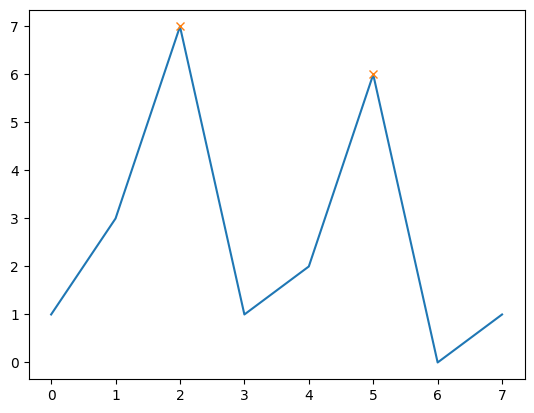

In [12]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

data = np.array([1, 3, 7, 1, 2, 6, 0, 1])
peaks, _ = find_peaks(data, height=2)
print("Peaks at indices:", peaks)

plt.plot(data)
plt.plot(peaks, data[peaks], "x")
plt.show()

## signal.spectrogram
### Compute a spectrogram of a signal.

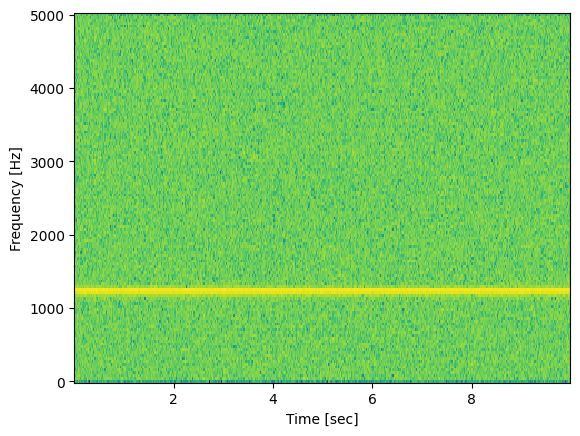

In [13]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp * np.sin(2 * np.pi * freq * time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

f, t, Sxx = spectrogram(x, fs)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# 5. Interpolation


## interpolate.interp1d
### Interpolate a 1-D function.

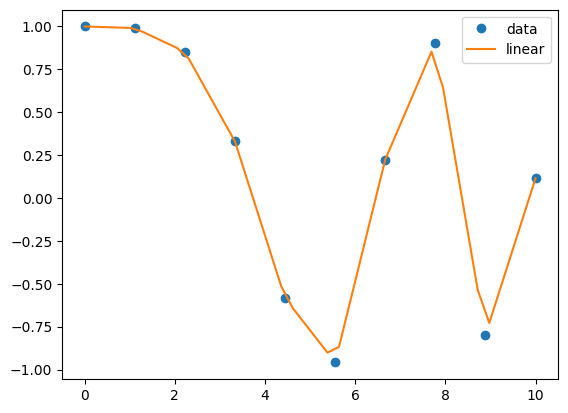

In [14]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=10, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y, kind='linear')

xnew = np.linspace(0, 10, num=40, endpoint=True)
ynew = f(xnew)

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.legend(['data', 'linear'], loc='best')
plt.show()

# 6. Sparse Matrices

## sparse.csr_matrix
### Compressed Sparse Row matrix.

In [15]:
import numpy as np
from scipy.sparse import csr_matrix

data = np.array([1, 2, 3, 4, 5, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
indptr = np.array([0, 2, 3, 6])
csr = csr_matrix((data, indices, indptr), shape=(3, 3))
print(csr)

  (0, 0)	1
  (0, 2)	2
  (1, 2)	3
  (2, 0)	4
  (2, 1)	5
  (2, 2)	6


## special.expit
### The logistic sigmoid function.

In [16]:
from scipy.special import expit
import numpy as np

# Define an input array
x = np.array([1, 2, 3])

# Compute the logistic sigmoid of each element
sigmoid_values = expit(x)

print(sigmoid_values)

[0.73105858 0.88079708 0.95257413]


# 7. Spatial Algorithms and Data Structures

## spatial.distance.cdist
### Compute distance between each pair of the two collections of inputs.

In [17]:
import numpy as np
from scipy.spatial.distance import cdist

A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[1, 0], [2, 3], [3, 4]])
distances = cdist(A, B, 'euclidean')
print(distances)

[[2.         1.41421356 2.82842712]
 [4.47213595 1.41421356 0.        ]
 [7.21110255 4.24264069 2.82842712]]


## spatial.KDTree
### Efficient nearest-neighbor search.

In [18]:
import numpy as np
from scipy.spatial import KDTree

points = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
tree = KDTree(points)
dist, idx = tree.query([2, 3])
print("Nearest neighbor index:", idx)
print("Distance:", dist)

Nearest neighbor index: 0
Distance: 1.4142135623730951


# Advanced Optimization with Constraints

## optimize.minimize with Constraints
### Let's consider a more complex optimization problem with constraints. We will minimize a quadratic objective function subject to linear equality and inequality constraints.

In [19]:
import numpy as np
from scipy.optimize import minimize

# Objective function
def objective_function(x):
    return x[0]**2 + x[1]**2 + x[2]**2

# Constraints
# x[0] + x[1] + x[2] = 1 (equality constraint)
def constraint1(x):
    return x[0] + x[1] + x[2] - 1

# x[0] - x[1] >= 0 (inequality constraint)
def constraint2(x):
    return x[0] - x[1]

# Initial guess
x0 = [0.5, 0.5, 0.5]

# Constraints definitions
cons = (
    {'type': 'eq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2}
)

# Bounds for variables
bnds = ((0, None), (0, None), (0, None))

# Perform the optimization
result = minimize(objective_function, x0, method='SLSQP', bounds=bnds, constraints=cons)
print("Optimal solution:", result.x)
print("Objective function value:", result.fun)

Optimal solution: [0.33333333 0.33333333 0.33333333]
Objective function value: 0.3333333333333332


# Signal Processing Functions

## Filtering using scipy.signal
## Low-pass Filter
### Design a low-pass filter and apply it to a signal.

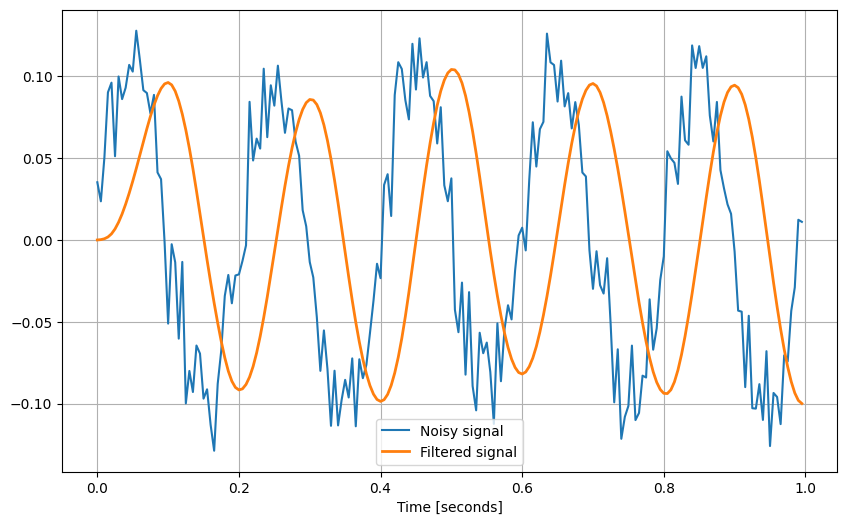

In [20]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

# Create a noisy signal
np.random.seed(0)
t = np.linspace(0, 1.0, 200, endpoint=False)
a = 0.02
f0 = 5.0
x = 0.1 * np.sin(2 * np.pi * f0 * t) + a * np.random.randn(len(t))

# Design a Butterworth low-pass filter
order = 3
cutoff = 7.0
b, a = butter(order, cutoff, fs=200, btype='low', analog=False)

# Apply the filter to the signal
y = lfilter(b, a, x)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Noisy signal')
plt.plot(t, y, label='Filtered signal', linewidth=2)
plt.xlabel('Time [seconds]')
plt.grid(True)
plt.legend()
plt.show()

## Convolution using scipy.signal
### Apply a convolution to a signal using a specific kernel.

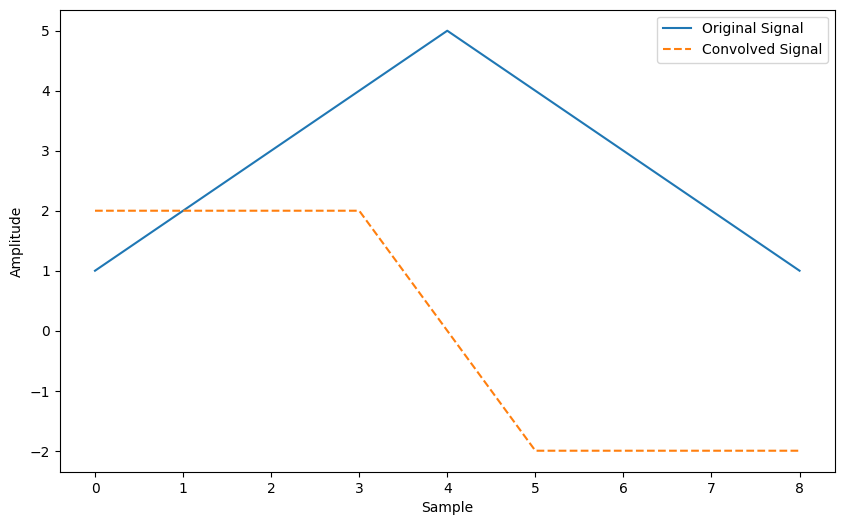

In [21]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt

# Define a simple signal
signal = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Define a kernel
kernel = np.array([1, 0, -1])

# Apply convolution
convolved_signal = convolve(signal, kernel, mode='same')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Original Signal')
plt.plot(convolved_signal, label='Convolved Signal', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Spectrogram using scipy.signal.spectrogram
### Compute and display a spectrogram of a signal.

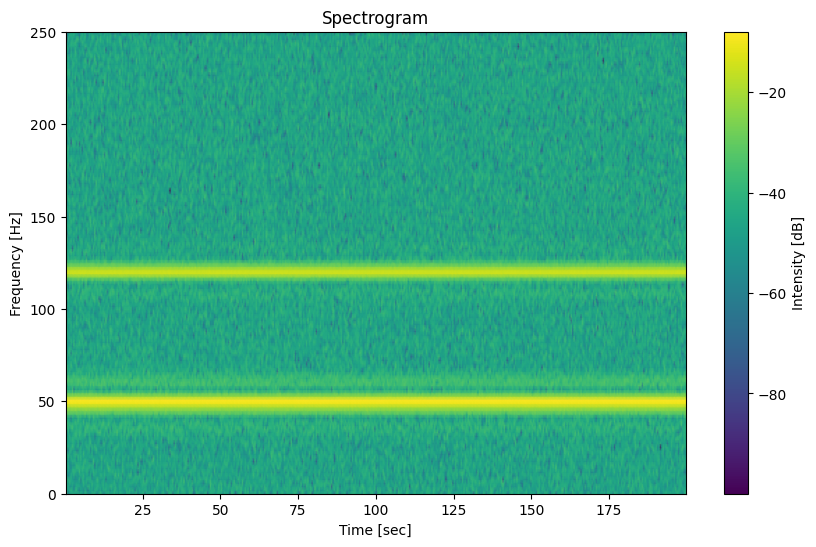

In [22]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Create a signal with different frequency components
fs = 500
N = 1e5
time = np.arange(N) / fs
x = np.sin(2 * np.pi * 50 * time) + 0.5 * np.sin(2 * np.pi * 120 * time)
x += np.random.normal(scale=0.1, size=time.shape)

# Compute the spectrogram
f, t, Sxx = spectrogram(x, fs)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.title('Spectrogram')
plt.show()